## Exercise 2.1
If you have Jupyter, load _chap02.ipynb_, read through it, and run the examples.
You can also view this notebook at [ThinkDSP - Chapter 2](http://tinyurl.com/thinkdsp02).

# ===================================================================

## Exercise 2.2
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats.

See [Sawtooth Wave - Wikipedia](http://en.wikipedia.org/wiki/Sawtooth_wave).

Write a class called `SawtoothSignal` that extends `Signal` and provides `evaluate` to evaluate a sawtooth signal.
Compute the _spectrum_ of a sawtooth wave. How does the **harmonic structure** compare to triangle and square waves?

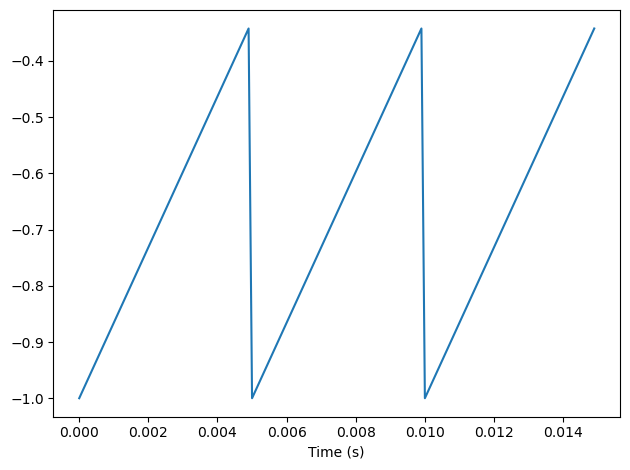

In [103]:
import thinkdsp_exercises as td

class SawtoothSignal(td.Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / td.PI2
        frac, _ = td.np.modf(cycles)
        ys = td.normalize(td.unbias(frac) - self.amp)
        return ys

signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
td.decorate(xlabel='Time (s)')

In [104]:
wave = signal.make_wave(duration=1, framerate=10000)
wave.apodize()
wave.make_audio()

# ===================================================================

## Exercise 2.3
Make a `square signal` at 1100 Hz and make a _wave_ that samples it at 10,000 frames per second.
If you plot the `spectrum`, you can see that most of the harmonics are **aliased**.
When you listen to the wave, can you **hear** the aliased harmonics?

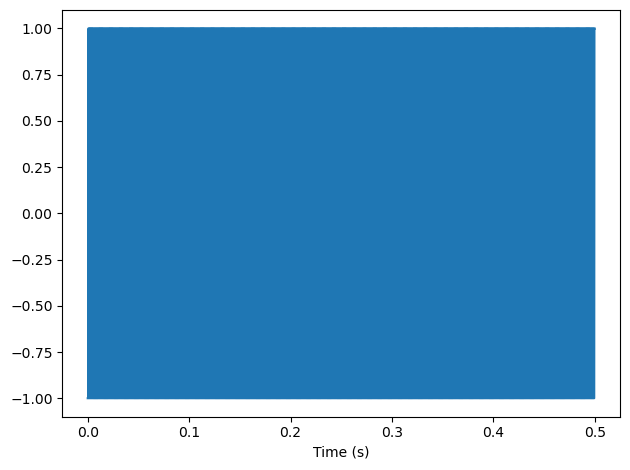

In [105]:
square = td.SquareSignal(1100).make_wave(duration=0.5, framerate=10000)
square.plot()
td.decorate(xlabel="Time (s)")

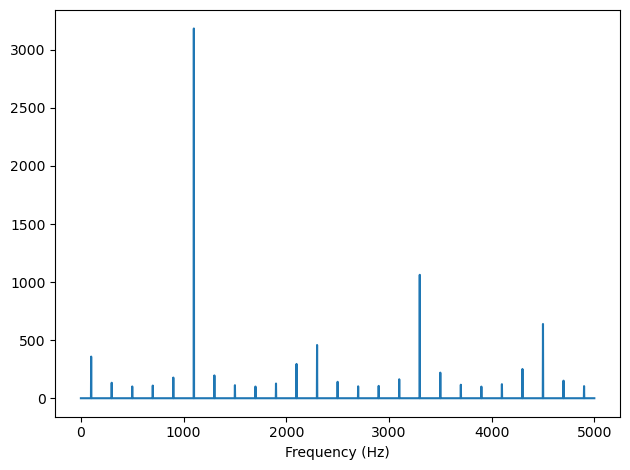

In [106]:
square.make_spectrum().plot()
td.decorate(xlabel='Frequency (Hz)')

In [107]:
wave = signal.make_wave(duration=1, framerate=10000)
wave.make_audio()

# ===================================================================

## Exercise 2.4
If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that they start at zero. So `spectrum.hs[0]` is the magnitude of the component with **frequency 0**.

But what does that mean?

Try this experiment:
1. Make a _triangle signal_ with frequency 440 and make a `Wave` with duration 0.01 seconds. Plot the _waveform_.
2. Make a `Spectrum` object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3. Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

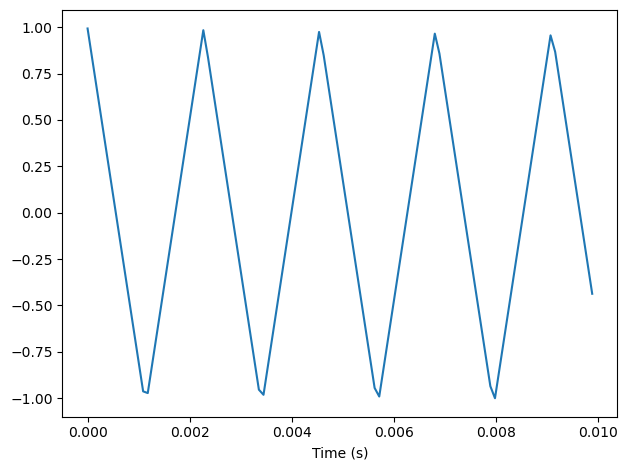

In [108]:
signal = td.TriangleSignal(440)
triangle = signal.make_wave(duration=0.01)
triangle.plot()
td.decorate(xlabel="Time (s)")

In [109]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

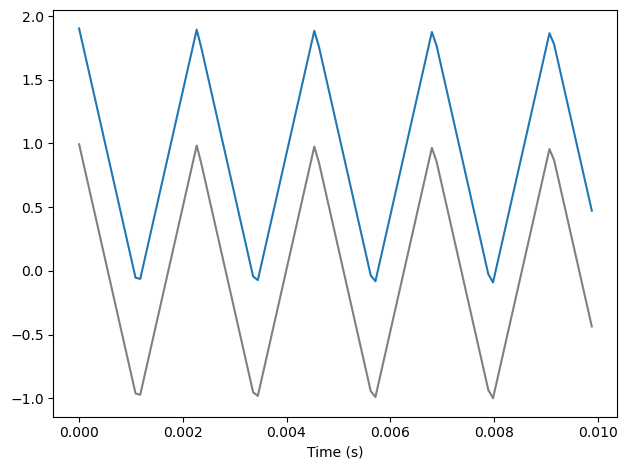

In [110]:
spectrum.hs[0] = 100
wave = spectrum.make_wave()
triangle.plot(color='gray')
wave.plot()
td.decorate(xlabel="Time (s)")

# ===================================================================

## Exercise 2.5
Write a function that takes a `Spectrum` as a parameter and modifies it by _dividing each element of **hs** by the corresponding frequency from **fs**_.

**Hint**: since division by zero is undefined, you might want to set `spectrum.hs[0] = 0`.

Test your function using a _square_, _triangle_, or _sawtooth_ wave.
1. Compute the `Spectrum` and plot it.
2. Modify the `Spectrum` using your function and plot it again.
3. Make a `Wave` from the modified `Spectrum` and listen to it. What effect does this operation have on the signal?

In [111]:
def filtered_spectrum(spectrum):
    for i, val in enumerate(spectrum.hs):
        if i == 0:
            spectrum.hs[0] = 0
        else:
            spectrum.hs[i] = val / spectrum.fs[i]

In [112]:
# Another solution given by the author
# def filter_spectrum(spectrum):

#    """Divides the spectrum through by the fs.
#    spectrum: Spectrum object
#    """
#    # avoid division by 0
#    spectrum.hs[1:] /= spectrum.fs[1:]
#    spectrum.hs[0] = 0

In [113]:
wave = td.TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Here's what the before (^) and after (v) look like.

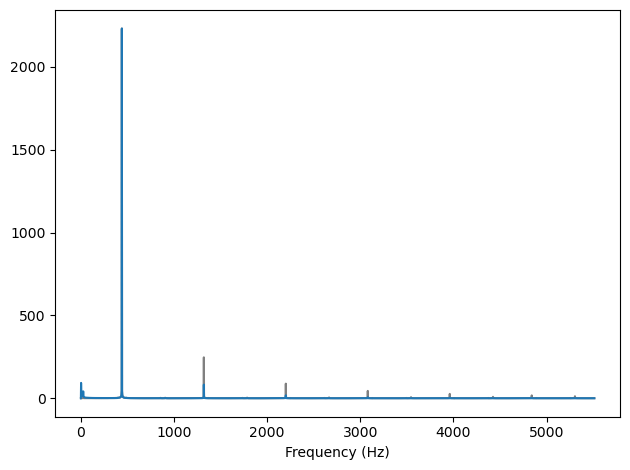

In [114]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='gray')
filtered_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
td.decorate(xlabel='Frequency (Hz)')

In [115]:
filtered = spectrum.make_wave()
filtered.make_audio()

# ===================================================================

## Exercise 2.6
_Triangle_ and _square_ waves have **odd harmonics** only; the _sawtooth_ wave has both **even and odd** harmonics.

The harmonics of the _square_ and _sawtooth_ waves drop off in proportion to $1/f$; the harmonics of the _triangle_ wave drop off like $1/f²$.

Can you find a waveform that has **even and odd harmonics** that drop off like **$1/f²$**?

**Hint**: There are two ways you could approach this:
- You could construct the signal you want by adding up sinusoids;
- or you could start with a signal that is similar to what you want and modify it.

In [151]:
freq: int = 440
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=17600)
wave.make_audio()

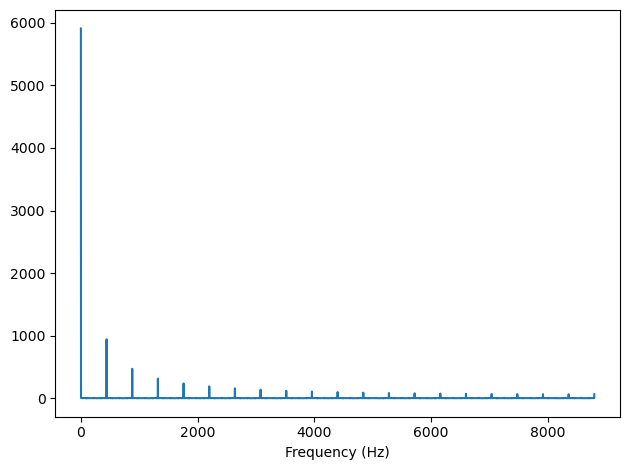

In [152]:
spectrum = wave.make_spectrum()
spectrum.plot()
td.decorate(xlabel='Frequency (Hz)')

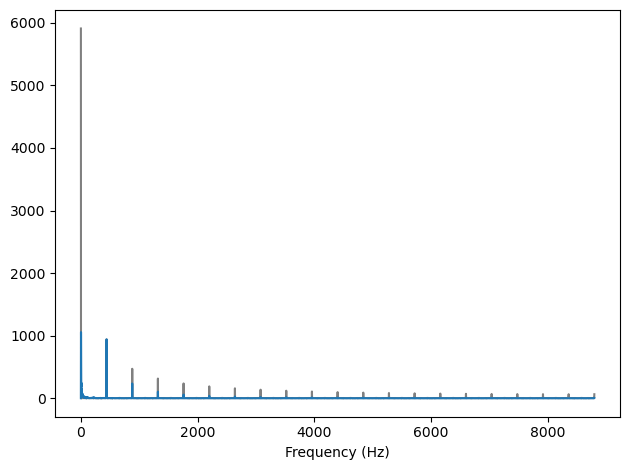

In [153]:
spectrum.plot(color='gray')
filtered_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
td.decorate(xlabel='Frequency (Hz)')

In [154]:
wave = spectrum.make_wave()
wave.make_audio()

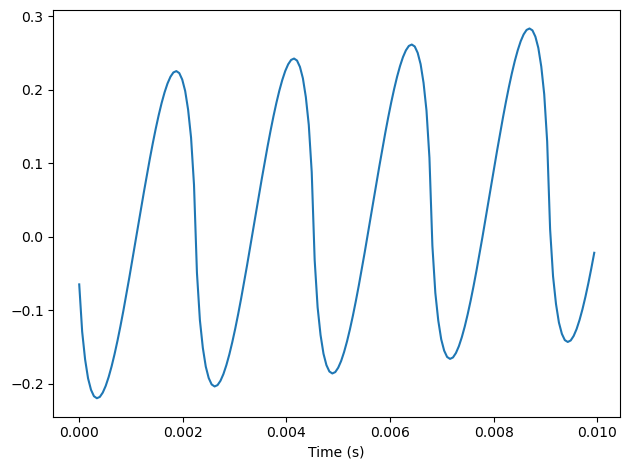

In [155]:
wave.segment(duration=0.01).plot()
td.decorate(xlabel='Time (s)')